## Final Project Submission

Please fill out:
* Student name: Phil Conrad Kirundi
* Student pace: Full Time Hybrid
* Scheduled project review date/time: N/A
* Instructor name: Mr. Antonny Muiko



## Naviar Corporation Aircraft Project Analysis

![Company Logo](<images/Screenshot (277).png>)

## Overview

Naviar Corporation is a company that rents and sells luxury  vehicles and offers chauffeuring services. However, the company has decided to venture into the aircraft industry where it would be purchasing and operating airplanes for commercial and private enterprises.

In this project, the public dataset from the National Transportation Safety Board will be used to determine the aircrafts that have the least amount of risks.

## Business Understanding

![Private Jet](images/private_jet_services_group_inc__cover.jpeg)

Naviar Corporation requires a risk-free set of commercial and private aircraft in order to avoid casualties and financial losses which might damage the business. I am responsible for analyzing data/findings and developing insights and recommendations that will help the head of the new aviation division decide which aircraft to purchase. 

## Data Understanding

The aviation accident data (1962-2023) from the National Transportation Safety Board highlights the civil aviation accidents and selected incidents in the United States and international waters. In this case, there would be statistics about the plane descriptions, type of accidents and the number of fatalities/injuries sustained during the accident.

The Event ID is the unique identifier.
I need to get the description of the dataset in order to know the data structure and data types in order to clean the data.

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [199]:
df = pd.read_csv('./data/Aviation_Data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_9360\222585957.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/Aviation_Data.csv')


There seems to be a lot of null values in many of the columns.
We then have to figure out the outlook of the 1st 10 rows and the last 10 rows.

In [200]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [201]:
df.tail(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90338,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,NaN,...,NaN,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90339,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
90340,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
90341,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
90342,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


## Data Preparation

### Data Cleaning

I will normalize the column names for easier clarity.

In [202]:
df.columns = df.columns.str.lower().str.replace('.', '_')

df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Checking number of missing values in each column

In [203]:
df.isna().sum()

event_id                   1459
investigation_type            0
accident_number            1459
event_date                 1459
location                   1511
country                    1685
latitude                  55966
longitude                 55975
airport_code              40216
airport_name              37644
injury_severity            2459
aircraft_damage            4653
aircraft_category         58061
registration_number        2841
make                       1522
model                      1551
amateur_built              1561
number_of_engines          7543
engine_type                8555
far_description           58325
schedule                  77766
purpose_of_flight          7651
air_carrier               73700
total_fatal_injuries      12860
total_serious_injuries    13969
total_minor_injuries      13392
total_uninjured            7371
weather_condition          5951
broad_phase_of_flight     28624
report_status              7843
publication_date          16689
dtype: i

I need to delete rows based on NaN values. In this case, the `accident_number` column should not have any missing values because it is a unique identifier.

In [204]:
df.dropna(subset=['accident_number'], inplace=True)
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [205]:
df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport_code              38757
airport_name              36185
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
registration_number        1382
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7096
far_description           56866
schedule                  76307
purpose_of_flight          6192
air_carrier               72241
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
report_status              6384
publication_date          15230
dtype: i

In [206]:
df['aircraft_category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [207]:
df['make'].nunique()

8237

## Data Visualization

We then visualize the number of fatalities according to the phase of flight.

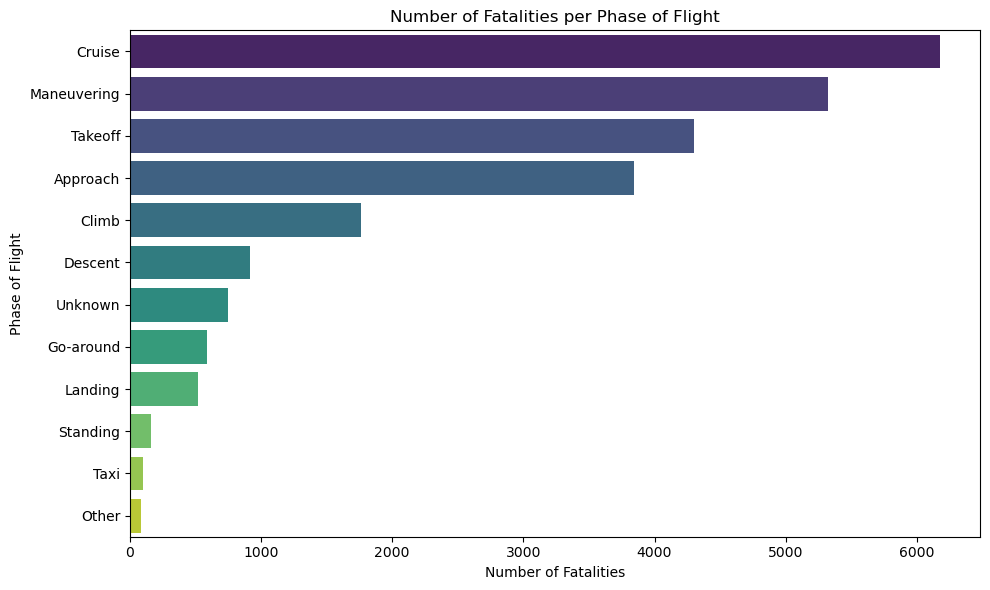

In [208]:
fatalities_by_phase = df.groupby('broad_phase_of_flight')['total_fatal_injuries'].sum().reset_index()

fatalities_by_phase = fatalities_by_phase.sort_values(by='total_fatal_injuries', ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='total_fatal_injuries', y='broad_phase_of_flight', data=fatalities_by_phase, palette='viridis')
plt.xlabel('Number of Fatalities')
plt.ylabel('Phase of Flight')
plt.title('Number of Fatalities per Phase of Flight')
plt.tight_layout()
plt.show()